
# Decomposition Algorithm with Python/Gurobi
## [Jon Lee](https://sites.google.com/site/jonleewebpage/home), 11/2/2020

Apply the (Dantzig-Wolfe) Decomposition Algorithm to:

\begin{align*}\tag{Q}
z = \min~& c'x\\
&Ex \geq h\\
&Ax   = b\\
&x \geq 0,
\end{align*}
treating $Ex \geq h$ as the ``complicating constraints''.

Notes:
* In this implementaion, we never delete generated columns 

References:
* Jon Lee, "A First Course in Linear Optimization", Fourth Edition (Version 4.0), Reex Press, 2013-20.

MIT License

Copyright (c) 2020 Jon Lee

Permission is hereby granted, free of charge, to any person obtaining a copy 
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [1]:
%reset -f
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

class StopExecution(Exception):
    def _render_traceback_(self):
        pass

In [2]:
MAXIT = 500
# generate a random example
n = 100   # number of variables
m1 = 200  # number of equations to relax
m2 = 50  # number of equations to keep
np.random.seed(25)   # change the seed for a differemt example 
E=0.01*np.random.randint(-5,high=5,size=(m1,n)).astype(float) #np.random.randn(m1,nt)
A=0.01*np.random.randint(-2,high=3,size=(m2,n)).astype(float) #np.random.randn(m2,nt)

# choose the right-hand sides so that Q will be feasible
xfeas=0.1*np.random.randint(0,high=5,size=n).astype(float)
h=E.dot(xfeas) - 0.1*np.random.randint(0,high=10,size=m1).astype(float)      
b=A.dot(xfeas)

# choose the objective function so that the dual of Q will be feasible
yfeas=0.1*np.random.randint(0,high=5,size=m1).astype(float)
pifeas=0.1*np.random.randint(-5,high=5,size=m2).astype(float)
c=np.transpose(E)@yfeas + np.transpose(A)@pifeas +  0.1*np.random.randint(0,high=1,size=n).astype(float)   

*****  Solve as one big LP --- for comparison purposes
Academic license - for non-commercial use only - expires 2021-08-26
Using license file C:\Users\jonxlee\gurobi.lic
Discarded solution information
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 250 rows, 100 columns and 21957 nonzeros
Model fingerprint: 0xd5eae979
Coefficient statistics:
  Matrix range     [1e-02, 5e-02]
  Objective range  [2e-02, 5e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 1e+00]
Presolve time: 0.01s
Presolved: 250 rows, 100 columns, 21957 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.2122000e+31   1.799360e+33   4.212200e+01      0s
     211   -5.6119344e+00   0.000000e+00   0.000000e+00      0s

Solved in 211 iterations and 0.04 seconds
Optimal objective -5.611934358e+00
 
*****  Proceed to Decomposition
Gurobi Optimizer version 9.1.2 build v9.

  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.0977834e+29   1.997552e+33   4.195567e-01      0s

Solved in 81 iterations and 0.01 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.13078332455640806
 
***** Currently in Phase 1 . Iteration number 6
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 207 columns and 1602 nonzeros
Coefficient statistics:
  Matrix range     [2e-04, 4e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.3078332e+29   1.736155e+31   1.307833e-01      0s
       2    9.4893166e-03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  9.489316612e-03
 
*

       0   -1.5817491e+31   4.786288e+33   1.265399e+02      0s

Solved in 84 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.12334441320500278
 
***** Currently in Phase 1 . Iteration number 12
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 213 columns and 2803 nonzeros
Coefficient statistics:
  Matrix range     [2e-04, 4e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.0836103e+28   9.448403e+30   3.083610e-02      0s
       5    8.9959953e-03   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  8.995995330e-03
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count

Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [2e-04, 4e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -9.3647375e+30   3.656278e+32   3.745895e+01      0s

Solved in 63 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -1.4382028325459768
 
***** Currently in Phase 1 . Iteration number 18
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 219 columns and 4007 nonzeros
Coefficient statistics:
  Matrix range     [2e-04, 4e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.438202

Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [1e-04, 4e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.0337732e+31   8.254967e+34   1.627019e+02      0s
      14   -2.5550650e-01   0.000000e+00   0.000000e+00      0s

Solved in 14 iterations and 0.01 seconds
Optimal objective -2.555064955e-01
***** Gurobi Subproblem solve status: 2
***** sigma= 0.1327524250411195
***** reduced cost= -0.38825892055995787
 
***** Currently in Phase 1 . Iteration number 24
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 225 columns and 5209 nonzeros
Coefficient statistics:
  Matrix range     [2e-04, 4e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       


Solved in 9 iterations and 0.01 seconds
Optimal objective  5.286905616e-05
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [4e-07, 4e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -8.9716721e+30   1.212726e+33   1.148374e+03      0s
      29   -9.7726683e-02   0.000000e+00   0.000000e+00      0s

Solved in 29 iterations and 0.02 seconds
Optimal objective -9.772668277e-02
***** Gurobi Subproblem solve status: 2
***** sigma= 0.11205651776309548
***** reduced cost= -0.20978320053784663
 
***** Currently in Phase 1 . Iteration number 30
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical 

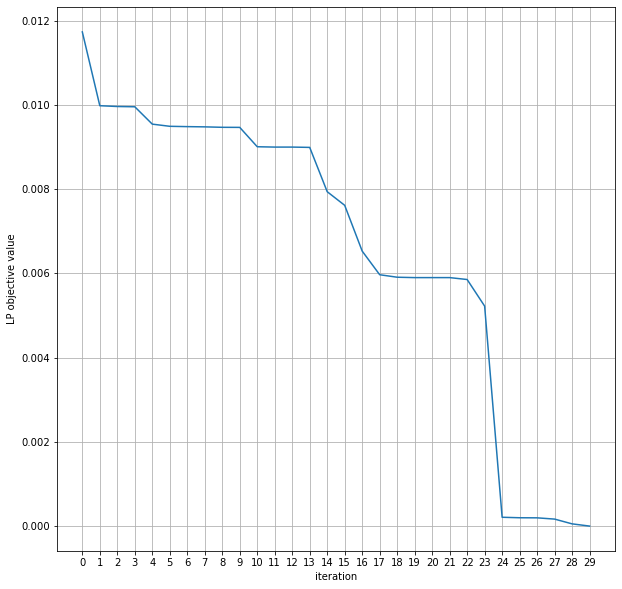

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 230 columns and 6212 nonzeros
Model fingerprint: 0x5fffefb2
Coefficient statistics:
  Matrix range     [9e-05, 4e+03]
  Objective range  [3e+00, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Presolve removed 55 rows and 200 columns
Presolve time: 0.01s
Presolved: 146 rows, 30 columns, 4362 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.5652233e+02   5.013465e+02   0.000000e+00      0s
      12   -3.3379333e+00   0.000000e+00   0.000000e+00      0s

Solved in 12 iterations and 0.02 seconds
Optimal objective -3.337933307e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient s

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 236 columns and 7412 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 4e+03]
  Objective range  [3e+00, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.2216263e+31   1.893786e+31   2.221626e+01      0s
       7   -3.3926755e+00   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds
Optimal objective -3.392675548e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [5e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual 

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 242 columns and 8614 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 4e+03]
  Objective range  [3e+00, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.9529939e+30   2.669287e+30   1.952994e+00      0s
       2   -3.3995164e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective -3.399516444e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [2e-04, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual 


Solved in 72 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -2.600092543147781
 
***** Currently in Phase 2 . Iteration number 48
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 248 columns and 9818 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 4e+03]
  Objective range  [3e+00, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0400370e+31   9.125324e+30   1.040037e+01      0s
       4   -3.4288535e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective -3.428853489e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Op

       0   -3.7970468e+32   2.023216e+34   3.797047e+02      0s
      13   -1.1353440e+01   0.000000e+00   0.000000e+00      0s

Solved in 13 iterations and 0.01 seconds
Optimal objective -1.135343952e+01
***** Gurobi Subproblem solve status: 2
***** sigma= 5.152680261336954
***** reduced cost= -16.50611978471458
 
***** Currently in Phase 2 . Iteration number 54
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 254 columns and 11022 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 4e+03]
  Objective range  [3e+00, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.6506120e+31   8.740575e+30   1.650612e+01      0s
      14   -3.4382047e+00   0.000000e+00   0.000000e+00      0s

Solved in 14 iterations and 0.01 seconds
Optimal objective -3.

  Objective range  [2e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.8911185e+32   6.766212e+33   3.891118e+02      0s

Solved in 76 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -4.666114188793282
 
***** Currently in Phase 2 . Iteration number 60
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 260 columns and 12224 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 4e+03]
  Objective range  [3e+00, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.8664457e+31   1.406700e+31   1.866446e+01      0s
       3   -3.5022828e+00   0.000000e+00   0.000000e+00      0s

Solved in 

  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -9.7889274e+31   6.950406e+32   1.957785e+02      0s

Solved in 36 iterations and 0.01 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -42.39824653969509
 
***** Currently in Phase 2 . Iteration number 66
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 266 columns and 13425 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 4e+03]
  Objective range  [3e+00, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0599562e+31   1.294109e+31   1.059956e+01      0s
       5   -3.5518991e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective -3.551899073e+00
 
*

       0   -5.9788652e+32   1.371991e+34   5.978865e+02      0s
      17   -6.2258677e+00   0.000000e+00   0.000000e+00      0s

Solved in 17 iterations and 0.01 seconds
Optimal objective -6.225867740e+00
***** Gurobi Subproblem solve status: 2
***** sigma= 1.7465301322875249
***** reduced cost= -7.972397872681679
 
***** Currently in Phase 2 . Iteration number 72
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 272 columns and 14627 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -7.9723979e+30   2.573013e+30   7.972398e+00      0s
      15   -3.5593673e+00   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.01 seconds
Optimal objective -3

  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.5946635e+30   1.706806e+34   2.594664e+00      0s

Solved in 59 iterations and 0.01 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -1.9095264318212912
 
***** Currently in Phase 2 . Iteration number 78
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 278 columns and 15828 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.9095264e+30   1.961134e+31   1.909526e+00      0s
       3   -3.5921668e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective -3.592166783e+00
 


Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [5e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.8089990e+31   2.981362e+34   4.808999e+01      0s

Solved in 47 iterations and 0.01 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -21.290454870829883
 
***** Currently in Phase 2 . Iteration number 84
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 284 columns and 17031 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -8.5161819e+31   9.981661e+31   8.516182e+01      0s
       8   -3.64

  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.4238787e+30   2.415712e+35   1.423879e+00      0s

Solved in 9 iterations and 0.01 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.13559165229525605
 
***** Currently in Phase 2 . Iteration number 90
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 290 columns and 18231 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.3389329e+30   1.219668e+31   4.338933e+00      0s
       6   -3.6533576e+00   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds
Optimal objective -3.653357576e+00
 



Solved in 68 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.013348482321696054
 
***** Currently in Phase 2 . Iteration number 96
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 296 columns and 19431 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.3393929e+28   1.478270e+30   5.339393e-02      0s
       1   -3.6535336e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective -3.653533577e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 thread

***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.3093718783638906
 
***** Currently in Phase 2 . Iteration number 102
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 302 columns and 20632 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -7.7342970e+28   1.535855e+30   7.734297e-02      0s
       1   -3.6537898e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective -3.653789803e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonze

       0   -7.8969884e+30   1.336243e+33   7.896988e+00      0s

Solved in 72 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -86.43385718190132
 
***** Currently in Phase 2 . Iteration number 108
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 308 columns and 21835 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0804232e+31   2.436882e+31   1.080423e+01      0s
       7   -3.6587120e+00   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds
Optimal objective -3.658712010e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count

Optimal objective -6.599408742e+00
***** Gurobi Subproblem solve status: 2
***** sigma= 3.2322258586549295
***** reduced cost= -9.831634600789139
 
***** Currently in Phase 2 . Iteration number 114
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 314 columns and 23036 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -9.8316346e+30   5.658544e+30   9.831635e+00      0s
      19   -3.6592589e+00   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds
Optimal objective -3.659258880e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 

  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.7392735e+32   1.635100e+34   3.739274e+02      0s
      13   -6.2270348e+00   0.000000e+00   0.000000e+00      0s

Solved in 13 iterations and 0.01 seconds
Optimal objective -6.227034819e+00
***** Gurobi Subproblem solve status: 2
***** sigma= 3.254181658083775
***** reduced cost= -9.481216476633444
 
***** Currently in Phase 2 . Iteration number 120
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 320 columns and 24240 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.1851521e+30   1.559984e+30   1.185152e+00      0s
       1   -3.6595916e+00   

 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [3e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.0134535e+30   3.249949e+33   3.013454e+00      0s

Solved in 60 iterations and 0.01 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -4.127265305630495
 
***** Currently in Phase 2 . Iteration number 126
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 326 columns and 25443 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [1e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0338390e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective -1.033839041e+01
***** Gurobi Subproblem solve status: 2
***** sigma= 4.090137390687506
***** reduced cost= -14.42852779844161
 
***** Currently in Phase 2 . Iteration number 132
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 332 columns and 26645 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00,

      33   -3.6989762e+00   0.000000e+00   0.000000e+00      0s

Solved in 33 iterations and 0.01 seconds
Optimal objective -3.698976225e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [2e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.6881921e+32   1.428842e+33   2.688192e+02      0s
      25   -8.5593150e+00   0.000000e+00   0.000000e+00      0s

Solved in 25 iterations and 0.02 seconds
Optimal objective -8.559314986e+00
***** Gurobi Subproblem solve status: 2
***** sigma= 4.262997012112052
***** reduced cost= -12.822311998463034
 
***** Currently in Phase 2 . Iteration number 138
***** Solving Main LP...
Gurobi Optimizer 

       6   -3.7125058e+00   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds
Optimal objective -3.712505779e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [3e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.7732675e+30   3.109077e+33   1.773268e+00      0s

Solved in 60 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.22675203499421315
 
***** Currently in Phase 2 . Iteration number 144
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


Optimal objective -3.712496927e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [3e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.5579905e+29   3.259375e+32   2.557990e-01      0s

Solved in 63 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.293583903468857
 
***** Currently in Phase 2 . Iteration number 150
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 350 columns and 30249 nonzeros
Coefficient statistics:
  Matrix range     [

      23   -3.7142575e+00   0.000000e+00   0.000000e+00      0s

Solved in 23 iterations and 0.01 seconds
Optimal objective -3.714257511e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [1e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.6204721e+32   5.295578e+32   1.620472e+02      0s

Solved in 98 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -39.07216966014763
 
***** Currently in Phase 2 . Iteration number 156
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
O

  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.0145081e+31   1.928791e+32   6.014508e+01      0s
       3   -3.7290837e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective -3.729083702e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [5e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.6061383e+30   3.465346e+33   3.606138e+00      0s

Solved in 42 iterations and 0.01 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost= -1.5424965890397964
 
***** Currently in Phase 2 . Iteration number

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 367 columns and 33659 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.5709561e+31   1.259994e+32   5.570956e+01      0s
       6   -3.7812259e+00   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds
Optimal objective -3.781225932e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [2e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 373 columns and 34862 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.2262233e+31   4.455250e+30   1.226223e+01      0s
      25   -3.9722313e+00   0.000000e+00   0.000000e+00      0s

Solved in 25 iterations and 0.01 seconds
Optimal objective -3.972231302e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [1e-04, 8e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dua

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 379 columns and 36065 nonzeros
Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.5786503e+30   2.249397e+30   4.578650e+00      0s
      44   -4.2580824e+00   0.000000e+00   0.000000e+00      0s

Solved in 44 iterations and 0.02 seconds
Optimal objective -4.258082375e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [5e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dua

Coefficient statistics:
  Matrix range     [9e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.9844265e+28   8.627660e+30   6.984426e-02      0s
       3   -4.2604683e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds
Optimal objective -4.260468281e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [8e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -7.3732361e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective 

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 391 columns and 38470 nonzeros
Coefficient statistics:
  Matrix range     [3e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.9324431e+30   2.651797e+30   4.932443e+00      0s
      39   -4.4094010e+00   0.000000e+00   0.000000e+00      0s

Solved in 39 iterations and 0.02 seconds
Optimal objective -4.409400967e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [7e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dua

Coefficient statistics:
  Matrix range     [3e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0317416e+29   3.099387e+30   1.031742e-01      0s
       2   -4.4384574e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective -4.438457408e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [4e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.7923120e+29   5.743358e+33   5.792312e-01      0s

Solved in 56 iterations and 0.02 seconds
Unbounded model
*

  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.8624798e+28   1.797588e+31   6.862480e-02      0s
       4   -4.4409976e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective -4.440997645e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [6e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.1562891e+29   2.698054e+33   1.156289e-01      0s

Solved in 66 iterations and 0.02 seconds
Unbounded model
***** Gurobi Subproblem solve status: 5
***** reduced cost=

Coefficient statistics:
  Matrix range     [3e-05, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.5910097e+31   6.079485e+31   2.591010e+01      0s
       8   -4.4560264e+00   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.01 seconds
Optimal objective -4.456026423e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [5e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.3326227e+30   3.074359e+31   1.332623e+00      0s

Solved in 53 iterations and 0.02 seconds
Unbounded model
*

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 415 columns and 43276 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.3668777e+31   1.196380e+32   4.366878e+01      0s
       7   -4.4981205e+00   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds
Optimal objective -4.498120496e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [9e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual

Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -9.4391263e+29   2.494362e+30   9.439126e-01      0s
       1   -4.5000896e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.02 seconds
Optimal objective -4.500089560e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [6e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.3821432e+32   2.065899e+34   1.382143e+02      0s

Solved in 53 iterations and 0.02 seconds
Unbounded model
*

Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -7.0844427e+30   3.547962e+30   7.084443e+00      0s
      32   -4.5013999e+00   0.000000e+00   0.000000e+00      0s

Solved in 32 iterations and 0.02 seconds
Optimal objective -4.501399887e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [7e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.6059977e+32   2.500150e+34   6.605998e+02      0s
      10   -4.3594411e+00   0.000000e+00   0.000000e+00   

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 433 columns and 46880 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.8791505e+29   1.799506e+31   1.879151e-01      0s
       4   -4.5217327e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.02 seconds
Optimal objective -4.521732696e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [7e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 439 columns and 48082 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.2260506e+30   1.617284e+31   1.226051e+00      0s
       1   -4.5291031e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective -4.529103120e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [4e-04, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 445 columns and 49285 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.9258065e+30   4.196920e+30   4.925806e+00      0s
      27   -4.5437128e+00   0.000000e+00   0.000000e+00      0s

Solved in 27 iterations and 0.02 seconds
Optimal objective -4.543712819e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [5e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dua


Solved in 40 iterations and 0.01 seconds
Optimal objective -3.695977832e+00
***** Gurobi Subproblem solve status: 2
***** sigma= 2.717430306369839
***** reduced cost= -6.413408138787267
 
***** Currently in Phase 2 . Iteration number 251
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 451 columns and 50489 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.4134081e+30   4.019492e+30   6.413408e+00      0s
      28   -4.5665566e+00   0.000000e+00   0.000000e+00      0s

Solved in 28 iterations and 0.01 seconds
Optimal objective -4.566556559e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical 

 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [6e-03, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.3848889e+31   2.766489e+33   3.384889e+01      0s
      17   -3.1821886e+00   0.000000e+00   0.000000e+00      0s

Solved in 17 iterations and 0.01 seconds
Optimal objective -3.182188585e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -0.1035907447531163
***** reduced cost= -3.0785978402838605
 
***** Currently in Phase 2 . Iteration number 257
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 462 columns and 52700 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.3108643e+30   1.842875e+31   6.310864e+00      0s
      15   -4.7250172e+00   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.02 seconds
Optimal objective -4.725017172e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [6e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dua

  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.8699589e+31   7.863458e+31   3.869959e+01      0s
      60   -1.7314340e+00   0.000000e+00   0.000000e+00      0s

Solved in 60 iterations and 0.02 seconds
Optimal objective -1.731434039e+00
***** Gurobi Subproblem solve status: 2
***** sigma= 0.8136916144143489
***** reduced cost= -2.545125653333005
 
***** Currently in Phase 2 . Iteration number 268
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 468 columns and 53906 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.5451257e+30   3.348876e+30   2.545126e+00  

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.7558075e+30   6.293069e+30   2.755808e+00      0s
      11   -4.9588313e+00   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.02 seconds
Optimal objective -4.958831288e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [2e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.4481820e+32   6.953352e+32   1.448182e+02      0s
      61   -1.9416269e+00   0.000000e+00   0.000000e+00      0s

Solved in 61 iterations and 0.02 seconds
Optimal objective -1.941626937e+00
***** Gurobi Subproblem solve status: 2
***** sigma= 0.6315178849619754
*****

Optimal objective -1.189095157e+00
***** Gurobi Subproblem solve status: 2
***** sigma= 0.043303453372473405
***** reduced cost= -1.2323986099579898
 
***** Currently in Phase 2 . Iteration number 279
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 479 columns and 56117 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 1e+04]
  Objective range  [3e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.2323986e+30   2.497409e+30   1.232399e+00      0s
      22   -5.0804101e+00   0.000000e+00   0.000000e+00      0s

Solved in 22 iterations and 0.02 seconds
Optimal objective -5.080410080e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up 

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [3e-03, 7e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -7.5138101e+31   4.385521e+32   7.513810e+01      0s
      42   -1.7636122e+00   0.000000e+00   0.000000e+00      0s

Solved in 42 iterations and 0.02 seconds
Optimal objective -1.763612199e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -0.36784528275677697
***** reduced cost= -1.3957669159794044
 
***** Currently in Phase 2 . Iteration number 285
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 485 columns and 57323 nonzeros
Coefficient statistics:
  Matrix range     [1e-06

  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.2999396e+30   1.903139e+31   1.299940e+00      0s
       3   -5.3466239e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds
Optimal objective -5.346623869e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [2e-04, 7e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.5994440e+31   1.191744e+33   6.599444e+01      0s
      22   -1.5748892e+00   0.000000e+00   0.000000e+00      0s

Solved in 22 iterations and 0.02 seconds
Optimal objective -1.574889239e+00
***** Guro

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 496 columns and 59531 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.0283234e+30   2.249680e+31   2.028323e+00      0s
      30   -5.3651102e+00   0.000000e+00   0.000000e+00      0s

Solved in 30 iterations and 0.02 seconds
Optimal objective -5.365110233e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [4e-03, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dua

Optimal objective -1.847358523e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -0.7849936116378557
***** reduced cost= -1.0623649110818358
 
***** Currently in Phase 2 . Iteration number 302
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 502 columns and 60735 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0623649e+30   2.927065e+30   1.062365e+00      0s
      31   -5.3773930e+00   0.000000e+00   0.000000e+00      0s

Solved in 31 iterations and 0.02 seconds
Optimal objective -5.377392993e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up t

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [2e-03, 8e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.6679766e+31   1.586588e+32   3.667977e+01      0s
      40   -1.5020410e+00   0.000000e+00   0.000000e+00      0s

Solved in 40 iterations and 0.02 seconds
Optimal objective -1.502041045e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -0.3522463371090252
***** reduced cost= -1.1497947078367274
 
***** Currently in Phase 2 . Iteration number 308
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 508 columns and 61941 nonzeros
Coefficient statistics:
  Matrix range     [1e-06,

Optimize a model with 201 rows, 513 columns and 62946 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.9894646e+29   2.275535e+30   5.989465e-01      0s
      11   -5.4466654e+00   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.02 seconds
Optimal objective -5.446665390e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [4e-03, 7e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.4434303e+31   1.160607e+32   2.443430e+01    

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0526879e+31   2.105085e+32   1.052688e+01      0s
      36   -1.7563904e+00   0.000000e+00   0.000000e+00      0s

Solved in 36 iterations and 0.02 seconds
Optimal objective -1.756390405e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -0.8991261731726149
***** reduced cost= -0.8572642315898572
 
***** Currently in Phase 2 . Iteration number 319
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 519 columns and 64152 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -8.5726423e+29   3.796675e+30   8.572642e-01      0s
       9   -5.4665229e+00   0.000000e+00   0.000000e+00    

       0   -9.8803440e+29   1.762107e+31   9.880344e-01      0s
       3   -5.4742961e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds
Optimal objective -5.474296092e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [8e-04, 7e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.6746432e+31   5.474475e+32   1.674643e+01      0s
      33   -1.0253562e+00   0.000000e+00   0.000000e+00      0s

Solved in 33 iterations and 0.01 seconds
Optimal objective -1.025356197e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -0.5692603456890533
***** reduced cost= -0.45609585130353714
 
***** Currently in Phase 2

***** Gurobi Subproblem solve status: 2
***** sigma= -0.8962916776239723
***** reduced cost= -0.3430452545500512
 
***** Currently in Phase 2 . Iteration number 330
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 530 columns and 66363 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.4304525e+29   3.863685e+30   3.430453e-01      0s
       8   -5.4807421e+00   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.02 seconds
Optimal objective -5.480742118e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [7e-03, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.1218741e+31   3.168535e+32   1.121874e+01      0s
      35   -1.0231162e+00   0.000000e+00   0.000000e+00      0s

Solved in 35 iterations and 0.02 seconds
Optimal objective -1.023116176e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -0.711490877185603
***** reduced cost= -0.31162529859391674
 
***** Currently in Phase 2 . Iteration number 336
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 536 columns and 67569 nonzeros
Coefficient statistics:
  Matrix range     [1e-06,

Optimize a model with 201 rows, 541 columns and 68574 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.8923392e+29   6.818623e+30   5.892339e-01      0s
      15   -5.5261512e+00   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.02 seconds
Optimal objective -5.526151153e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [5e-03, 7e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.9002205e+31   3.814916e+32   1.900221e+01    

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.1730375e+31   1.604771e+32   1.173038e+01      0s
      33   -1.2851094e+00   0.000000e+00   0.000000e+00      0s

Solved in 33 iterations and 0.02 seconds
Optimal objective -1.285109422e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -0.8991873986201532
***** reduced cost= -0.3859220228870025
 
***** Currently in Phase 2 . Iteration number 347
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 547 columns and 69780 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.8592202e+29   6.586172e+30   3.859220e-01      0s
       4   -5.5508917e+00   0.000000e+00   0.000000e+00    

       0   -2.5394421e+29   8.913614e+30   2.539442e-01      0s
      10   -5.5701696e+00   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.02 seconds
Optimal objective -5.570169625e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [1e-02, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.6989366e+30   1.942368e+32   3.698937e+00      0s
      29   -1.2224337e+00   0.000000e+00   0.000000e+00      0s

Solved in 29 iterations and 0.01 seconds
Optimal objective -1.222433652e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -1.0739720537734132
***** reduced cost= -0.14846159823223015
 
***** Currently in Phase 

***** Gurobi Subproblem solve status: 2
***** sigma= -0.9544803629198706
***** reduced cost= -0.1611410400251958
 
***** Currently in Phase 2 . Iteration number 358
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 558 columns and 71991 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.6114104e+29   2.869342e+31   1.611410e-01      0s
       5   -5.5795084e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.02 seconds
Optimal objective -5.579508418e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [1e-03, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -9.9413510e+29   1.392712e+32   9.941351e-01      0s
      30   -1.1813571e+00   0.000000e+00   0.000000e+00      0s

Solved in 30 iterations and 0.02 seconds
Optimal objective -1.181357097e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -1.086213483355564
***** reduced cost= -0.09514361378625025
 
***** Currently in Phase 2 . Iteration number 364
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 564 columns and 73197 nonzeros
Coefficient statistics:
  Matrix range     [1e-06,

Optimize a model with 201 rows, 569 columns and 74202 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0149978e+29   7.737147e+30   1.014998e-01      0s
      12   -5.5947378e+00   0.000000e+00   0.000000e+00      0s

Solved in 12 iterations and 0.02 seconds
Optimal objective -5.594737779e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [9e-03, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.8261317e+30   1.948240e+32   2.826132e+00    

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.3325349e+30   3.136741e+32   1.332535e+00      0s
      25   -1.1836625e+00   0.000000e+00   0.000000e+00      0s

Solved in 25 iterations and 0.01 seconds
Optimal objective -1.183662456e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -1.1147125140519845
***** reduced cost= -0.06894994172319868
 
***** Currently in Phase 2 . Iteration number 375
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 575 columns and 75408 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.8949942e+28   3.902510e+30   6.894994e-02      0s
       4   -5.6003279e+00   0.000000e+00   0.000000e+00   

       0   -3.0991503e+28   2.617775e+30   3.099150e-02      0s
       9   -5.6038684e+00   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.02 seconds
Optimal objective -5.603868388e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [6e-03, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0610607e+30   1.504423e+32   1.061061e+00      0s
      16   -1.1017083e+00   0.000000e+00   0.000000e+00      0s

Solved in 16 iterations and 0.02 seconds
Optimal objective -1.101708278e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -1.0648927497549356
***** reduced cost= -0.03681552831970336
 
***** Currently in Phase 2

***** Gurobi Subproblem solve status: 2
***** sigma= -1.1215505266478878
***** reduced cost= -0.029527839907512066
 
***** Currently in Phase 2 . Iteration number 386
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 586 columns and 77619 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.9527840e+28   6.046726e+30   2.952784e-02      0s
      11   -5.6095119e+00   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.02 seconds
Optimal objective -5.609511875e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [1e-03, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.1450328e+29   7.375935e+31   5.145033e-01      0s
      22   -1.1213007e+00   0.000000e+00   0.000000e+00      0s

Solved in 22 iterations and 0.01 seconds
Optimal objective -1.121300735e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -1.100719348860988
***** reduced cost= -0.020581386081860442
 
***** Currently in Phase 2 . Iteration number 392
***** Solving Main LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 201 rows, 592 columns and 78825 nonzeros
Coefficient statistics:
  Matrix range     [1e-06

Optimize a model with 201 rows, 597 columns and 79830 nonzeros
Coefficient statistics:
  Matrix range     [1e-06, 9e+04]
  Objective range  [3e+00, 9e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -7.8336420e+27   3.051731e+30   7.833642e-03      0s
      11   -5.6116896e+00   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.02 seconds
Optimal objective -5.611689574e+00
 
***** Solving Subproblem LP...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 50 rows, 100 columns and 3992 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e-02]
  Objective range  [7e-04, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 8e-02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.0618602e+29   3.384989e+31   3.061860e-01    

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0996308e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective -1.099630761e+00
***** Gurobi Subproblem solve status: 2
***** sigma= -1.0996307611968144
***** reduced cost= -2.886579864025407e-15
***** No more improving columns for Main
***** Phase II finished
***** Phase II objective -5.611934358015313
LP iter     LP val
---------  ---------
29           -3.337933307
30           -3.348073342
31           -3.388038102
32           -3.388390009
33           -3.389532342
34           -3.390085393
35           -3.392675548
36           -3.396216294
37           -3.397063091
38           -3.397096763
39           -3.397100656
40           -3.399325683
41           -3.399516444
42           -3.403298253
43           -3.404126621
44           -3.404216698
45           -3.408199788
46           -3.427992646
47           -3.428853489
48           -3.428915332
49         

389           -5.610956345
390           -5.61118588
391           -5.611261848
392           -5.611352693
393           -5.611479619
394           -5.61151479
395           -5.611620436
396           -5.611689574
397           -5.611735221
398           -5.611799514
399           -5.611839283
400           -5.611860504
401           -5.611934358
***** Reality check: recover the optimal x found by decomposition.
*****    Its objective value is: -5.611934358
 
***** Compare with LP value calculated without decomposition: -5.611934358


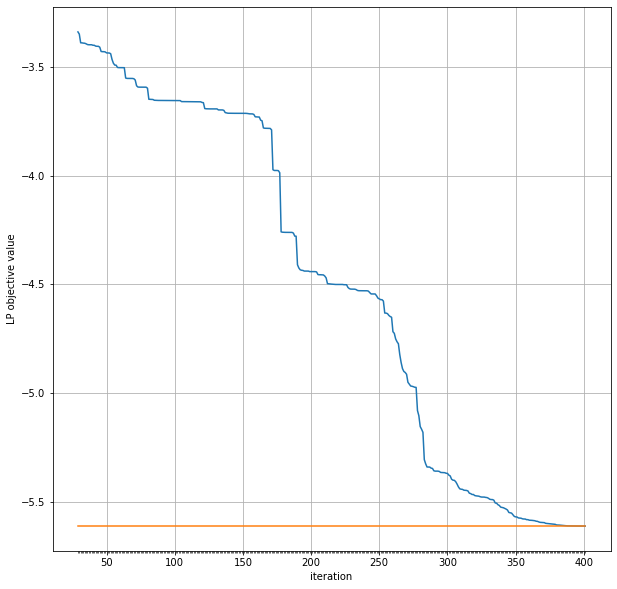

 
***** Number of basic-feasible solutions generated: 235
 
***** Number of basic-feasible rays generated: 167


In [3]:
print("*****  Solve as one big LP --- for comparison purposes")
modelQ = gp.Model()
xQ = modelQ.addMVar(n)  
objective = modelQ.setObjective(c@xQ, GRB.MINIMIZE)
constraintsQ1 = modelQ.addConstr(E@xQ >= h)
constraintsQ2 = modelQ.addConstr(A@xQ == b)
modelQ.optimize()
if modelQ.status != GRB.Status.OPTIMAL:
    print("***** Gurobi solve status:", modelQ.status)
    print("***** This is a problem. Stopping execution.")
    raise StopExecution
print(" ")
print("*****  Proceed to Decomposition")

# initialization for Decomposition
results1=[]
results2=[]
ITER=0
xgen=0
zgen=0
y=np.zeros(m1) 

# set up the Subproblem model and get one basic feasible solution
modelS = gp.Model()
#modelS.setParam('OutputFlag', 0)   # quiet the Gurobi output 
x = modelS.addMVar(n)  
constraintsS = modelS.addConstr(A@x == b)  
#modelS.setObjective(c@x, GRB.MINIMIZE)
modelS.optimize()
if modelS.status != GRB.Status.OPTIMAL:
    print("***** Gurobi (initial) Subproblem solve status:", modelS.status)
    print("***** This is a problem. Stopping execution.")
    raise StopExecution
xgen += 1

# construct a basis
XZ=np.reshape(x.X,(n,1))
#Z=np.r_[np.zeros((n-m1,m1)),np.eye(m1)]
#Z=np.empty((n,0), dtype=float)
h1=np.r_[h,(1)]
#B=np.c_[np.r_[np.eye(m1),np.zeros((1,m1))],np.r_[E@x.X,(1)]]
B=np.c_[-np.r_[np.eye(m1),np.zeros((1,m1))],np.r_[E@x.X,(1)]]


# set up the Main Phase-2 model
modelM2 = gp.Model()
s = modelM2.addMVar(m1+1)
modelM2.setObjective(c@x.X*s[m1], GRB.MINIMIZE)
modelM2.addConstrs(-s[i] + E[i,:]@x.X*s[m1] == h[i] for i in range(m1))
modelM2.addConstr(s[m1]==1)
modelM2.update()
constraintsM2=modelM2.getConstrs()

# Identify if the constructed basis is feasible to see if Phase 1 is needed
if min(np.linalg.solve(B, h1)) >= -1e-10:
    print('***** Phase I not needed')
    Phase=2
    modelM=modelM2
else:
    print('***** Phase I needed')
    Phase=1
    ITERphaseI=1
    modelM1=modelM2.copy()
    #modelM1.setParam('OutputFlag', 0)   # quiet the Gurobi output 
    constraintsM1=modelM1.getConstrs()
    # create the artificial variable
    newcol=gp.Column(-np.r_[E@x.X-np.ones(m1),(1)],constraintsM1)
    modelM1.setObjective(0.0, GRB.MINIMIZE)
    modelM1.addVar(obj=1.0, column=newcol, name='artificial')
    modelM=modelM1

while True:
    ITER += 1
    print(" ")
    print("***** Currently in Phase", Phase, ". Iteration number", ITER)    
    print("***** Solving Main LP...")
    modelM.optimize()
    if modelM.status != GRB.Status.OPTIMAL:
        print("***** Gurobi Main solve status:", modelM.status)
        print("***** This is a problem. Stopping execution.")
        raise StopExecution
    results1=np.append(results1,ITER-1)
    results2=np.append(results2,modelM.Objval)
    if Phase==1 and modelM.Objval < 0.0000001:
        print("***** Phase I succeeded")
        print("LP iter", "    LP val")
        print("---------  ---------")
        for j in range(ITER):
            print(int(results1[j]), "         ", np.round(results2[j],9))
        fig, ax = plt.subplots(figsize=(10,10))
        ax.plot(results1[0:ITER], results2[0:ITER])
        ax.set(xlabel='iteration', ylabel='LP objective value')
        ax.set_xticks(ticks=results1, minor=False)
        ax.grid()
        plt.show()
        ITERphaseI=ITER
        Phase=2
        # switch to the Phase II model
        modelM=modelM2
        modelM.optimize()
        # overwrite last iteration result with phase-II objective value
        results2[ITER-1]=modelM.Objval
    if ITER == MAXIT: break 
            
    constraintsM=modelM.getConstrs()
    for i in range(m1):
        y[i]=constraintsM[i].Pi
    sigma=constraintsM[m1].Pi
    if Phase==1: modelS.setObjective((-y.dot(E))@x, GRB.MINIMIZE)
    else: modelS.setObjective((c-y.dot(E))@x, GRB.MINIMIZE)
    print(" ")
    print("***** Solving Subproblem LP...")
    modelS.optimize()
    if modelS.status != GRB.Status.OPTIMAL and modelS.status != GRB.Status.UNBOUNDED:
        print("***** Gurobi Subproblem solve status:", modelS.status)
        print("***** This is a problem. Stopping execution.")
        raise StopExecution
    if modelS.status == GRB.Status.OPTIMAL:
        print("***** Gurobi Subproblem solve status:", modelS.status)
        reducedcost = -sigma + modelS.Objval
        print("***** sigma=",sigma)
        print("***** reduced cost=",reducedcost)
        if reducedcost < -0.0001:
            xnew=x.X
            if Phase==1:
                newcol=gp.Column(np.r_[E@xnew,(1)],constraintsM1)
                modelM1.addVar(obj=0.0, column=newcol)
            newcol=gp.Column(np.r_[E@xnew,(1)],constraintsM2)
            modelM2.addVar(obj=c@xnew, column=newcol)
            XZ=np.c_[XZ,xnew]
            xgen += 1
        else:   
            if Phase==1:
                print("***** No more improving columns for Main")
                print("***** Phase I finished without a feasible solution")
                print("***** Phase I objective", modelM.Objval)
                break
            else: # Phase 2
                print("***** No more improving columns for Main")
                print("***** Phase II finished")
                print("***** Phase II objective", modelM.Objval)
                break
    if modelS.status == GRB.Status.UNBOUNDED:
        print("***** Gurobi Subproblem solve status:", modelS.status)
        znew=x.UnbdRay
        if Phase==1:
            newcol=gp.Column(np.r_[E@znew,(0)],constraintsM1)
            modelM1.addVar(obj=0.0, column=newcol)
            reducedcost = -y.dot(E)@znew
        newcol=gp.Column(np.r_[E@znew,(0)],constraintsM2)
        modelM2.addVar(obj=c@znew, column=newcol)
        if Phase==2: 
            reducedcost = (c-y.dot(E))@znew
        print("***** reduced cost=", reducedcost)  
        #if reducedcost > 0.0001: input()
        XZ=np.c_[XZ,znew]  
        zgen += 1
        
print("LP iter", "    LP val")
print("---------  ---------")
for j in range(ITERphaseI-1,ITER):
    print(int(results1[j]), "         ", np.round(results2[j],9))
# recover the solution in the original variables x
greekvar=modelM2.getVars()[m1:ITER+m1]
greekval=np.zeros(ITER)
for i in range(ITER):
    greekval[i] = greekvar[i].X  
xhat=XZ@greekval 
print("***** Reality check: recover the optimal x found by decomposition.")
print("*****    Its objective value is:", np.round(c@xhat,9)) 
print(" ") 
print("***** Compare with LP value calculated without decomposition:",np.round(modelQ.Objval,9))

if ITER > ITERphaseI:
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(results1[ITERphaseI-1:ITER], results2[ITERphaseI-1:ITER])
    ax.plot(results1[ITERphaseI-1:ITER], modelQ.Objval*np.ones(ITER-ITERphaseI+1))
    ax.set(xlabel='iteration', ylabel='LP objective value')
    ax.set_xticks(ticks=results1[ITERphaseI-1:ITER], minor=True)
    ax.grid()
    plt.show()
print(" ")   
print("***** Number of basic-feasible solutions generated:", xgen)
print(" ")   
print("***** Number of basic-feasible rays generated:", zgen)